In [1]:
#Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')
message = pd.read_csv('megaline_messages.csv')

## Prepare the data

## Plans

In [5]:
# Printing the general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
#changing data type to caetgory  in the plan_name column 
plans['plan_name'] = plans['plan_name'].astype('category')

## Users

In [8]:
# Print the general/summary information about the users' DataFrame

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:

display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [10]:

#changing data types to Datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
display(users.dtypes)

display(users.head())

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
#splitting city column into city and state 
users[['City','State']] = users['city'].str.split(',', expand = True)
users = users.drop(columns = 'city')
display(users.head())

,user_id,first_name,last_name,age,reg_date,plan,churn_date,City,State
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaN,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaN,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,NaN,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,NaN,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,2018-05-23,surf,NaN,Seattle-Tacoma-Bellevue,WA MSA


## Calls

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [15]:
#changing call_date column in calls dataframe to datetime 

calls['call_date'] =pd.to_datetime( calls['call_date'])

#changing id to int dtype 
calls['id'] = calls['id'].astype('int64')
calls['call_date'] = calls['call_date'].astype('datetime64[M]')
#round integer in the duration column
calls['duration'] =calls['duration'].apply(np.ceil)

display(calls.head())

,id,user_id,call_date,duration
0,100093,1000,2018-12-01,9.0
1,1000145,1000,2018-12-01,14.0
2,1000247,1000,2018-12-01,15.0
3,1000309,1000,2018-12-01,6.0
4,1000380,1000,2018-12-01,5.0


## Messages

In [16]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
display(message.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
#changing data type
message['id'] = message['id'].astype('int64')
message['message_date'] = pd.to_datetime(message['message_date'])

## Internet

In [19]:
# Print a sample of data for the internet traffic
display(internet.head())


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [20]:
#changing data type to int and date time 
internet['id'] = internet['id'].astype('int64')
internet['session_date'] = pd.to_datetime(internet['session_date'])

## Aggregate data per user

In [21]:
# Calculate the number of calls made by each user per month.
#created a new months column for easier manipulation 
calls['month'] = calls['call_date'].dt.month
# groupby the month and ca
monthly_calls = calls.groupby(['month','user_id'])["call_date"].count().to_frame()


display(monthly_calls)

call_date
month user_id           
1     1042            18
      1077            42
      1185            23
      1196            42
      1214             5
...                  ...
12    1495            65
      1496            40
      1497            54
      1498            39
      1499            65

[2258 rows x 1 columns]

In [22]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_used = calls.groupby(['month','user_id'])['duration'].sum().to_frame()
display(minutes_used.head(2))

duration
month user_id          
1     1042        114.0
      1077        290.0

In [23]:
# Calculate the number of messages sent by each user per month. Save the result.
#adding a month column for easier maniplutation 
message['month'] = message['message_date'].dt.month

display(message.head())
#grouping month user and counting how many messages were sent by user id
monthly_message = message.groupby(['month','user_id'])['message_date'].count().to_frame()

,id,user_id,message_date,month
0,1000125,1000,2018-12-27,12
1,1000160,1000,2018-12-31,12
2,1000223,1000,2018-12-31,12
3,1000251,1000,2018-12-27,12
4,1000255,1000,2018-12-26,12


In [24]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['month'] = internet['session_date'].dt.month
internet_vol = internet.groupby(['month','user_id'])['mb_used'].sum().to_frame()
display(internet_vol.head())

mb_used
month user_id          
1     1042      1854.93
      1077     10635.64
      1185      6812.77
      1196      8908.61
      1214      1315.35

In [25]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#Merging minutes and calls togethor using an inner join
new = minutes_used.merge(monthly_calls, on = ['month','user_id'],how = 'outer')
display(new.head())
#Merging internet and messages using an inner join
df = internet_vol.merge(monthly_message, on = ['month','user_id'],how = 'outer')
#merging the two variables above togethor 
new_data = new.merge(df,on = ['month','user_id'],how = 'outer')
display(new_data.head())

duration  call_date
month user_id                     
1     1042        114.0         18
      1077        290.0         42
      1185        181.0         23
      1196        287.0         42
      1214         16.0          5

duration  call_date   mb_used  message_date
month user_id                                             
1     1042        114.0       18.0   1854.93           NaN
      1077        290.0       42.0  10635.64          37.0
      1185        181.0       23.0   6812.77           NaN
      1196        287.0       42.0   8908.61          23.0
      1214         16.0        5.0   1315.35           2.0

In [26]:
#merging new data and users plan column togethor using an leftjoin 
data_new = new_data.merge(users[['user_id',"plan"]],on= 'user_id' ,how= 'left')
#correctly setting up the right index 
data_new.set_axis(new_data.index, inplace = True)
data_new.reset_index(level='user_id', drop=True, inplace = True)


#renaming columns for easier comprehension
data_new = data_new.rename(columns = {'duration':'minutes_used','call_date':'calls_made','message_date':'message_sent', 'plan':"plan_name"})    

display(data_new)

,user_id,minutes_used,calls_made,mb_used,message_sent,plan_name
month,,,,,,
1,1042,114.0,18.0,1854.93,NaN,surf
1,1077,290.0,42.0,10635.64,37.0,ultimate
1,1185,181.0,23.0,6812.77,NaN,ultimate
1,1196,287.0,42.0,8908.61,23.0,ultimate
1,1214,16.0,5.0,1315.35,2.0,ultimate
...,...,...,...,...,...,...
12,1137,NaN,NaN,6745.66,56.0,surf
12,1194,NaN,NaN,31088.49,56.0,surf
12,1204,NaN,NaN,36730.05,78.0,ultimate


In [27]:
data_new = data_new.merge(plans, on = "plan_name", how ='left').set_index(data_new.index)    

In [28]:
#dropping na Values    
data = data_new.dropna()
print(len(data))

1759


In [29]:
# Calculate the monthly revenue for each user
#This function calculates the revenue by the user plan

def rev(df):
    if df['message_sent'] -df['messages_included'] >=0:
        message_rev = 0
    else:
        message_rev = (df['message_sent'] - df['messages_included']) * df['usd_per_message']
        
    if df['minutes_used'] - df['minutes_included']>= 0:
        mins_revs = 0
        
    else:
        mins_revs = (df['minutes_used'] - df['minutes_included'])*df['usd_per_minute']
    if(df['mb_used'] - df['mb_per_month_included'])<= 0:
        mb_revs = 0
    else:
        mb_revs = math.ceil((df['mb_used'] - df['mb_per_month_included'])/1024)*df['usd_per_gb']  
    return message_rev + mins_revs + mb_revs + df['usd_monthly_pay']

    
#applying the function to data frame and making a new column    
data['month_revs'] = data.apply(rev, axis = 1)

#cleaning up the data frame and resetting the index 
data.set_axis(data.index, inplace = True)
display(data.head(5))

C:\Users\15594\AppData\Local\Temp/ipykernel_1736/1722832351.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_revs'] = data.apply(rev, axis = 1)


,user_id,minutes_used,calls_made,mb_used,message_sent,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month_revs
month,,,,,,,,,,,,,,
1,1077,290.0,42.0,10635.64,37.0,ultimate,1000,30720,3000,70,7,0.01,0.01,33.27
1,1196,287.0,42.0,8908.61,23.0,ultimate,1000,30720,3000,70,7,0.01,0.01,33.10
1,1214,16.0,5.0,1315.35,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.18
1,1362,292.0,42.0,7894.79,21.0,surf,50,15360,500,20,10,0.03,0.03,12.89
2,1077,776.0,111.0,19926.55,67.0,ultimate,1000,30720,3000,70,7,0.01,0.01,38.43


## Study user behaviour

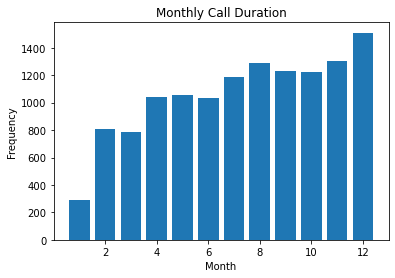

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
plt.bar(data.index, data["minutes_used"])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Call Duration')
plt.show()


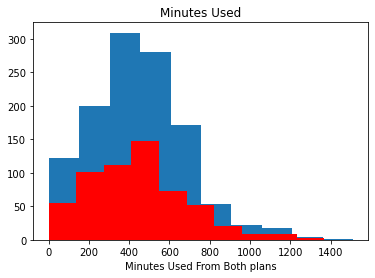

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
#reseting index for easier manipulation
data_new1 = data.reset_index()
#plotting minutes_used for each plan 
surf = data_new1[data_new1['plan_name'] == 'surf']
plt.hist(surf.minutes_used )
ultimate = data_new1[data_new1['plan_name'] == 'ultimate']
plt.hist(ultimate.minutes_used, color = 'red')
plt.title('Minutes Used')
plt.xlabel('Minutes Used From Both plans')
plt.show()

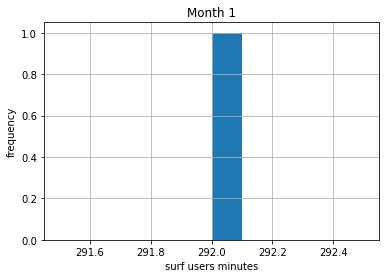

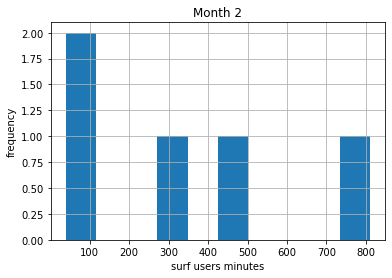

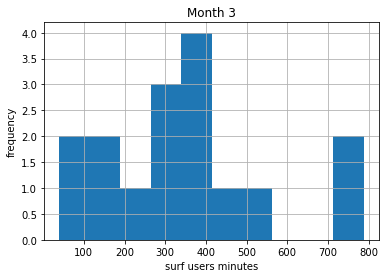

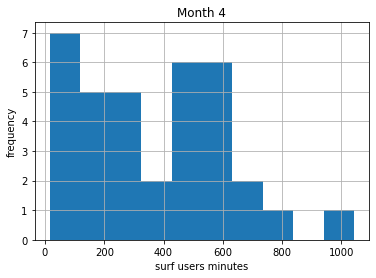

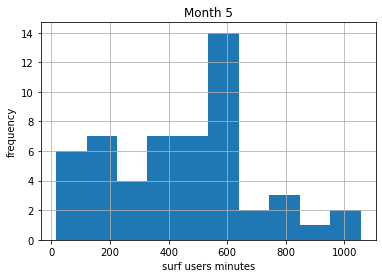

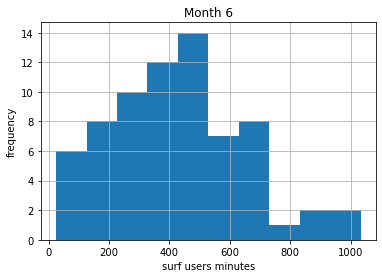

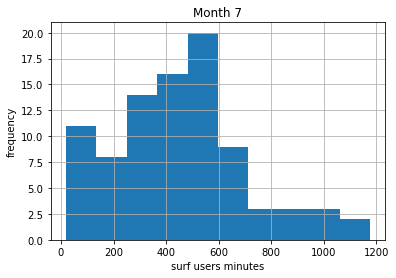

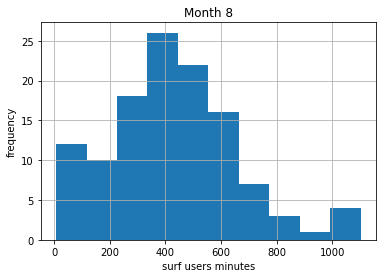

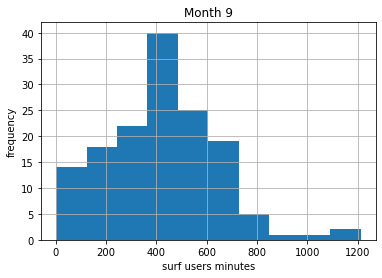

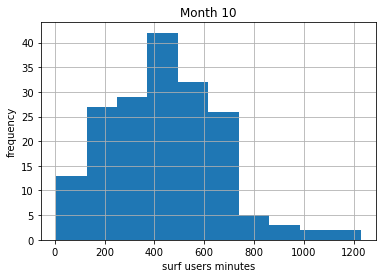

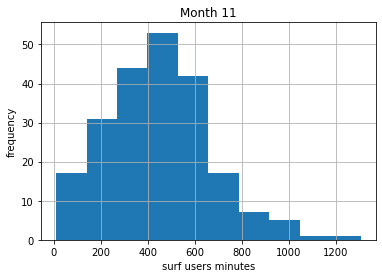

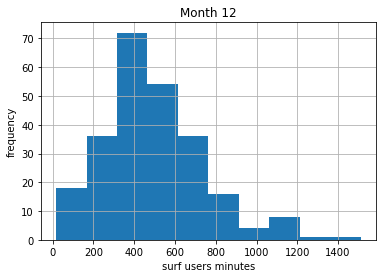

In [32]:
for x in range(1,13):
    surf[surf['month'] == x].hist('minutes_used')
    plt.title('Month {}'.format(x))
    plt.xlabel('surf users minutes')
    plt.ylabel('frequency')

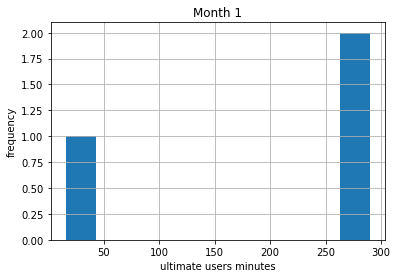

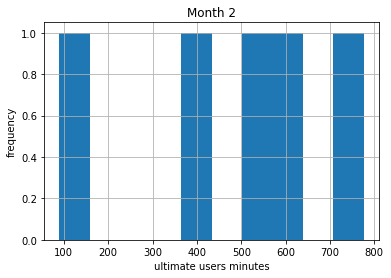

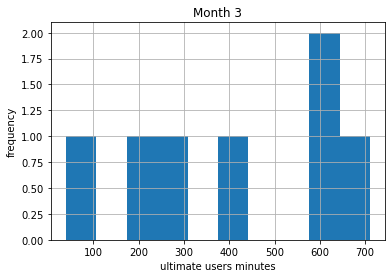

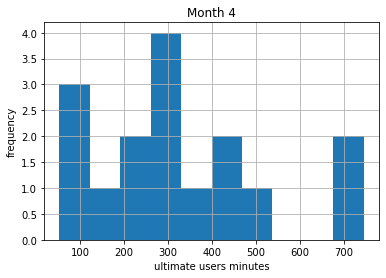

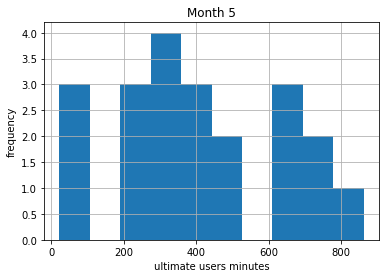

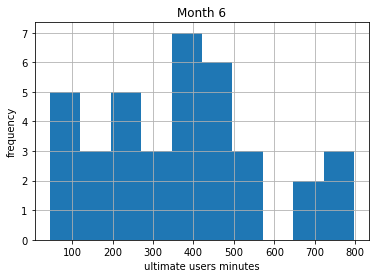

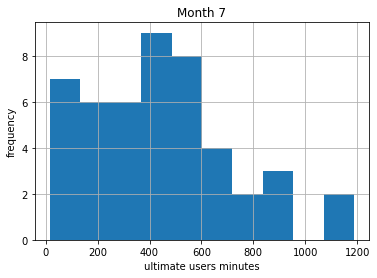

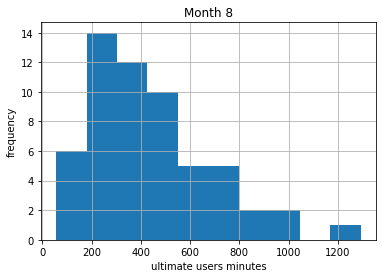

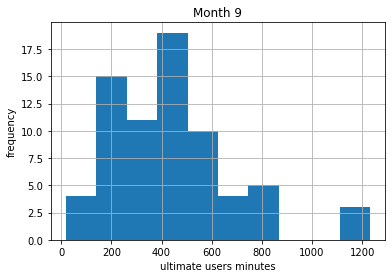

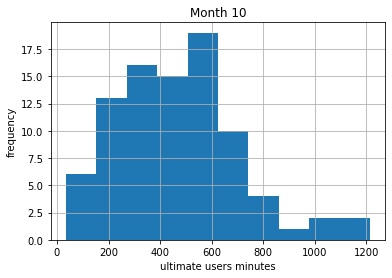

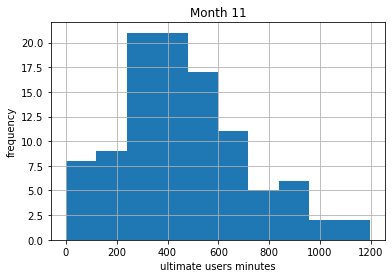

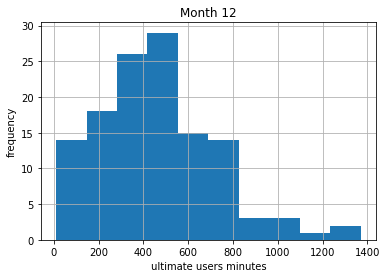

In [33]:
#looping over the 
for x in range(1,13):
    ultimate[ultimate['month'] == x].hist('minutes_used')
    plt.title('Month {}'.format(x))
    plt.xlabel('ultimate users minutes')
    plt.ylabel('frequency')

In [34]:
# Calculate the mean and the variance of the monthly call duration


display(surf.message_sent.agg (['mean', 'var','std', 'median']))
display(surf.groupby('month')['month_revs'].sum())

mean        39.489831
var       1044.217878
std         32.314360
median      32.000000
Name: message_sent, dtype: float64

month
1        12.89
2        70.85
3       495.45
4      1152.26
5      2329.34
6      3201.67
7      4890.72
8      6875.59
9      7515.47
10    10668.99
11    11077.21
12    15307.26
Name: month_revs, dtype: float64

In [35]:
display(ultimate.message_sent.agg(['mean', 'var','std', 'median']))

mean        46.455959
var       1084.393818
std         32.930135
median      41.000000
Name: message_sent, dtype: float64

<AxesSubplot:title={'center':'minutes_used'}, xlabel='month'>

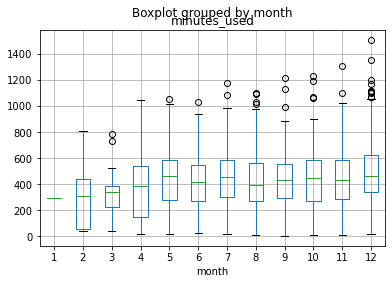

In [36]:
%matplotlib inline
#Plot a boxplot to visualize the distribution of the monthly call duration

display(surf.boxplot(column = 'minutes_used', by =  'month'))

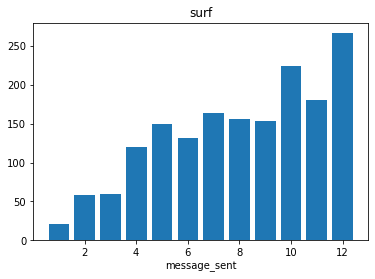

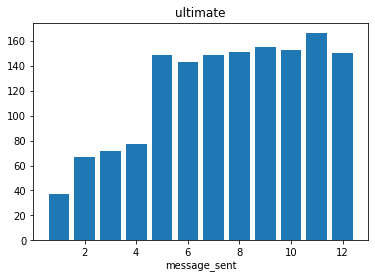

In [37]:
# Compare the number of messages users of each plan tend to send each month
plt.bar(surf['month'],surf['message_sent'])
plt.title("surf")
plt.xlabel('message_sent')
plt.show()
plt.bar(ultimate['month'],ultimate['message_sent'])
plt.title("ultimate")
plt.xlabel('message_sent')
plt.show()

<AxesSubplot:title={'center':'message_sent'}, xlabel='month'>

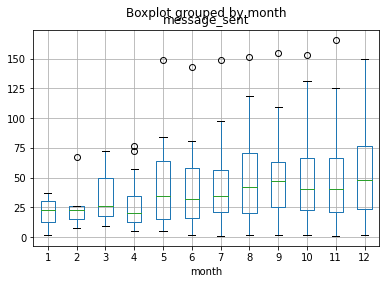

In [38]:
display(ultimate.boxplot(column = 'message_sent', by =  'month'))
plt.show()

<AxesSubplot:title={'center':'message_sent'}, xlabel='month'>

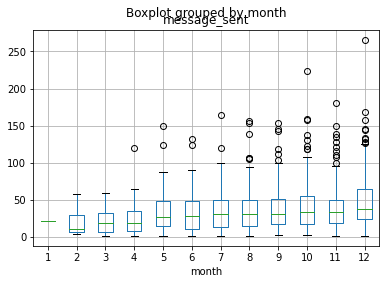

In [39]:
display(surf.boxplot(column = 'message_sent', by =  'month'))
plt.show()

### Internet

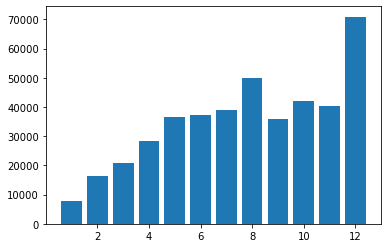

<BarContainer object of 579 artists>

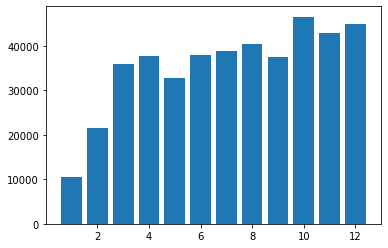

In [40]:
# Compare the amount of internet traffic consumed by users per plan
plt.bar(surf['month'], surf['mb_used'])
plt.show()
plt.bar(ultimate['month'], ultimate['mb_used'])

<AxesSubplot:title={'center':'mb_used'}, xlabel='month'>

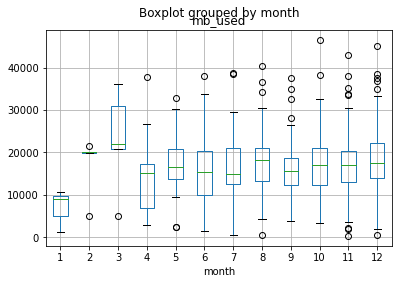

In [41]:
#boxplot showing the outlier within the internet use in the ultimate plan 
display(ultimate.boxplot(column = 'mb_used', by =  'month'))

<AxesSubplot:title={'center':'mb_used'}, xlabel='month'>

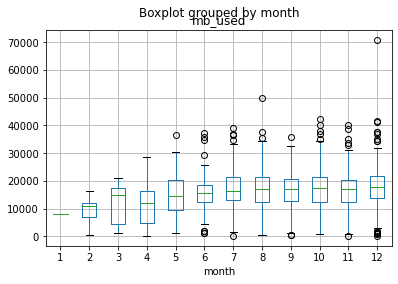

In [42]:
#boxplot showing the outlier within the internet use in the surf plan 
display(surf.boxplot(column = 'mb_used', by =  'month'))
# The internet is used more often in the late months of the year

## Revenue

<AxesSubplot:xlabel='month'>

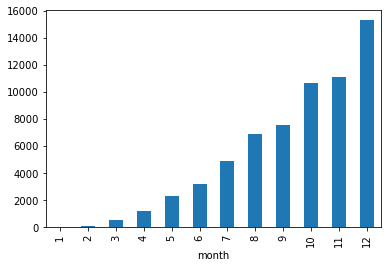

In [43]:
#showing monthly revune by surf plan
display(surf.groupby('month')['month_revs'].sum().plot(kind = 'bar'))
#most revenues in Decemember

<AxesSubplot:xlabel='month'>

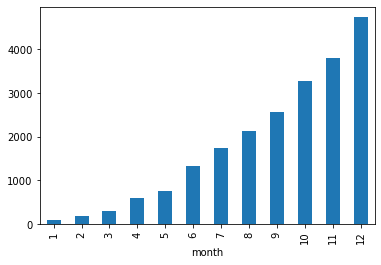

In [44]:
#showing monthly revenue bu ultimate plan 
display(ultimate.groupby('month')['month_revs'].sum().plot(kind = 'bar'))

In [45]:
#We can see that Surf plan is more profitable out of the two plans 
display(ultimate['month_revs'].sum()/len(data))
display(surf['month_revs'].sum()/ len(data))


#for both plans revenues are up in Decemember 
display(ultimate.groupby('month')['month_revs'].sum())
display(surf.groupby('month')['month_revs'].sum())

12.224633314383173

36.155599772598066

month
1       96.55
2      175.73
3      297.50
4      585.27
5      746.45
6     1337.98
7     1748.00
8     2126.09
9     2571.28
10    3280.02
11    3798.96
12    4739.30
Name: month_revs, dtype: float64

month
1        12.89
2        70.85
3       495.45
4      1152.26
5      2329.34
6      3201.67
7      4890.72
8      6875.59
9      7515.47
10    10668.99
11    11077.21
12    15307.26
Name: month_revs, dtype: float64

## Test statistical hypotheses

In [46]:
alpha = 0.05


results   = st.ttest_ind(ultimate['month_revs'], surf['month_revs'], equal_var =  False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  8.471541925741695e-24
We reject the null hypothesis


H0: Theres is no difference in revenue 
H1: The NY-NJ area brings in more revenue

In [47]:
# Test the hypotheses.
#merging user data 
data_city = data_new1.merge(users, on = "user_id", how = 'left')
# indexing showing only NY-NJ area
ny = data_city[data_city['State'].str.contains('NY')]

ny_avg = ny['month_revs'].mean()

alpha = 0.05  # critical statistical significance

results = st.ttest_1samp(surf['month_revs'], ny_avg )

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.0004637634983462729
We reject the null hypothesis


In [48]:
#Monthly revenue by city 
#We can see that NY_NJ area is at the top of most revenue. 
data_city['State']=data_city['State'].map(lambda x: x.rstrip('MSA'))
new_city = data_city.groupby('State')['month_revs'].sum()
display(new_city.to_frame().sort_values('month_revs',ascending = False))

,month_revs
State,
NY-NJ-PA,12789.58
CA,12560.34
TX,5899.67
FL,3386.74
MI,3335.74
PA-NJ-DE-MD,3223.12
MN-WI,3185.01
IL-IN-WI,2705.16
MA-NH,2662.25


# #Conclusion
I prepared the data by cleaning up the data set and performed a statistical anaylsis comparing both plans. After going through several anaylsis techniques we have can conclude that the Surf plans brings in the most revenue. Cities like NY, NJ, CA and TX are at the top of the list of cities that bring in the most revenues.